### Predict missing log data

I use the dataset of the <a href="https://github.com/seg/tutorials-2015#tutorials-2015"> Seismic Petrophysics SEG tutorial</a> by <a href="https://github.com/aadm"> Alessandro Amato del Monte</a>.

In this log file, part of RHO data are missing. 

Here we want to use machine learning method to fill predicted data and replace nan values.

** this is a single well tempale, for better accuracy, logs from multi wells should improve this method better.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [73]:
logs = pd.read_csv('qsiwell2_predict.csv')

logs.head(6)

,DEPTH,ZONE_NUM,VP,VS,RHO_OLD,GR,NPHI,RHO,SW,SWX,VPVS,IP,IS,VSH,RHOm,RHOf,PHI
0,2013.25,0,2294.7,876.9,2.00,91.88,0.49,NaN,NaN,NaN,2.62,NaN,NaN,0.49,2.73,NaN,NaN
1,2013.41,0,2296.7,943.0,2.05,86.80,0.48,2.24,1.0,1.0,2.44,5144.85,2112.42,0.44,2.72,1.09,0.29
2,2013.56,0,2290.4,912.5,2.11,86.00,0.45,2.24,1.0,1.0,2.51,5135.74,2046.09,0.43,2.72,1.09,0.29
3,2013.71,0,2277.5,891.6,2.20,87.36,0.41,2.24,1.0,1.0,2.55,5107.98,1999.68,0.44,2.72,1.09,0.29
4,2013.86,0,2262.0,890.5,2.20,90.40,0.43,2.24,1.0,1.0,2.54,5067.02,1994.78,0.48,2.73,1.09,0.30
5,2014.01,0,2263.1,863.1,2.17,93.31,0.47,2.24,1.0,1.0,2.62,5063.48,1931.11,0.51,2.73,1.09,0.30


In [37]:
logs.shape

(4117, 17)

In [38]:
logs.isnull().sum()

DEPTH          0
ZONE_NUM       0
VP             0
VS             0
RHO_OLD        0
GR             0
NPHI           0
RHO         1416
SW          1416
SWX         1416
VPVS           0
IP          1416
IS          1416
VSH            0
RHOm           0
RHOf        1416
PHI         1416
dtype: int64

Here we find some missing values of certain logs, some of them need be dropped.

In [82]:
col_names = ['SW','SWX','VPVS','IP','IS','RHOm','RHOf','PHI']
logs=logs.drop(col_names, axis=1)

logs.head()

,DEPTH,ZONE_NUM,VP,VS,RHO_OLD,GR,NPHI,RHO,VSH
0,2013.25,0,2294.7,876.9,2.00,91.88,0.49,NaN,0.49
1,2013.41,0,2296.7,943.0,2.05,86.80,0.48,2.24,0.44
2,2013.56,0,2290.4,912.5,2.11,86.00,0.45,2.24,0.43
3,2013.71,0,2277.5,891.6,2.20,87.36,0.41,2.24,0.44
4,2013.86,0,2262.0,890.5,2.20,90.40,0.43,2.24,0.48


In [40]:
logs.describe(percentiles=[.05, .25, .75, .95])

,DEPTH,ZONE_NUM,VP,VS,RHO_OLD,GR,NPHI,RHO,VSH
count,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,2701.000000,4117.000000
mean,2326.891999,4.383775,2977.098761,1371.293952,2.243605,72.784848,0.321299,2.225198,0.276876
std,181.145666,2.156737,449.355552,297.056552,0.104962,14.464482,0.089965,0.061964,0.164278
min,2013.250000,0.000000,1439.900000,688.800000,1.750000,48.370000,0.070000,2.040000,0.000000
5%,2044.618000,1.000000,2301.600000,888.960000,2.100000,56.786000,0.090000,2.120000,0.100000
25%,2170.070000,4.000000,2594.500000,1141.600000,2.180000,60.680000,0.280000,2.190000,0.140000
50%,2326.890000,4.000000,3036.100000,1415.300000,2.230000,68.030000,0.310000,2.220000,0.220000
75%,2483.710000,5.000000,3251.100000,1595.000000,2.290000,83.560000,0.390000,2.260000,0.400000
95%,2609.170000,9.000000,3886.900000,1795.400000,2.450000,100.484000,0.460000,2.330000,0.590000
max,2640.530000,9.000000,4431.000000,2427.800000,2.600000,136.510000,0.530000,2.550000,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

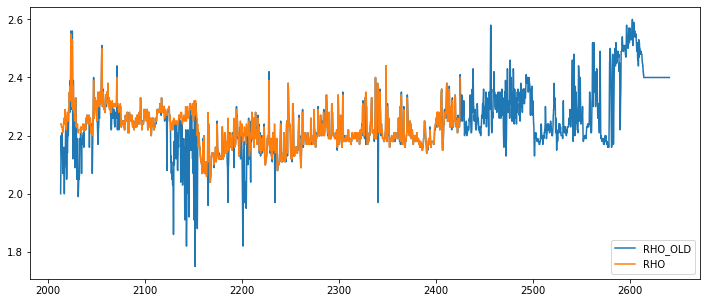

In [41]:
plt.figure(figsize=(12,5))
plt.plot(logs.DEPTH, logs.RHO_OLD)
plt.plot(logs.DEPTH, logs.RHO)
plt.legend(('RHO_OLD', 'RHO'), loc='lower right')
plt.show

From the above figure, it shows the RHO_OLD is very closed to RHO curve.

So there are two ways to fill the nan values of RHO.

## 1. Use RHO_OLD value for RHO

In [42]:
logdf_1 = logs.copy()

In [43]:
logdf_1.RHO.fillna(logdf_1.RHO_OLD, inplace=True)
logdf_1.isnull().values.any() 

False

<function matplotlib.pyplot.show(*args, **kw)>

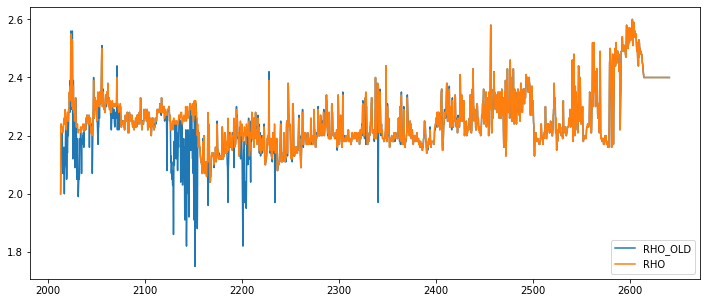

In [45]:
plt.figure(figsize=(12,5))
plt.plot(logdf_1.DEPTH, logdf_1.RHO_OLD)
plt.plot(logdf_1.DEPTH, logdf_1.RHO)
plt.legend(('RHO_OLD', 'RHO'), loc='lower right')
plt.show

## 2. Use machine learning to predict RHO

In [184]:
logdf_2 = logs.copy()

** since we don't a full dataset of RHO to validate model, here we give the prediction of RHO_OLD as first try

In [185]:
X = logdf_2.drop(['RHO_OLD', 'RHO'], axis=1).values

In [186]:
y = logdf_2.RHO_OLD.values

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### ** Random forest regression

In [189]:
from sklearn.ensemble import RandomForestRegressor

In [190]:
regr = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [191]:
predictions = regr.predict(X_test)

In [192]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [193]:
mean_absolute_error(y_test,predictions)

0.023175548671018172

In [194]:
r2_score(y_test,predictions)

0.8914607999177036

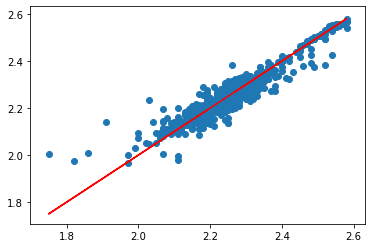

In [195]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

** It shows a good prediction for RHO_OLD, with R2 close to 0.9. 

Here we could re-do the prediction for RHO.

In [196]:
X1 = logdf_2[~logdf_2.RHO.isna()]
X2 = logdf_2[logdf_2.RHO.isna()]

In [197]:
X_train = X1.drop(['RHO_OLD', 'RHO'], axis=1).values
y_train = X1.RHO.values
X_test = X2.drop(['RHO_OLD', 'RHO'], axis=1).values
y_test = X2.RHO.values

In [198]:
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)

In [199]:
# fill prediction into nan cells
logdf_2.loc[logdf_2['RHO'].isnull(), 'RHO'] = predictions
logdf_2.head()

,DEPTH,ZONE_NUM,VP,VS,RHO_OLD,GR,NPHI,RHO,VSH
0,2013.25,0,2294.7,876.9,2.00,91.88,0.49,2.239781,0.49
1,2013.41,0,2296.7,943.0,2.05,86.80,0.48,2.240000,0.44
2,2013.56,0,2290.4,912.5,2.11,86.00,0.45,2.240000,0.43
3,2013.71,0,2277.5,891.6,2.20,87.36,0.41,2.240000,0.44
4,2013.86,0,2262.0,890.5,2.20,90.40,0.43,2.240000,0.48


<function matplotlib.pyplot.show(*args, **kw)>

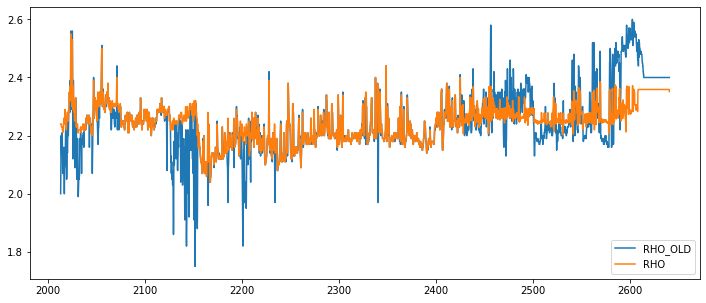

In [200]:
plt.figure(figsize=(12,5))
plt.plot(logdf_2.DEPTH, logdf_2.RHO_OLD)
plt.plot(logdf_2.DEPTH, logdf_2.RHO)
plt.legend(('RHO_OLD', 'RHO'), loc='lower right')
plt.show

### For better visualization

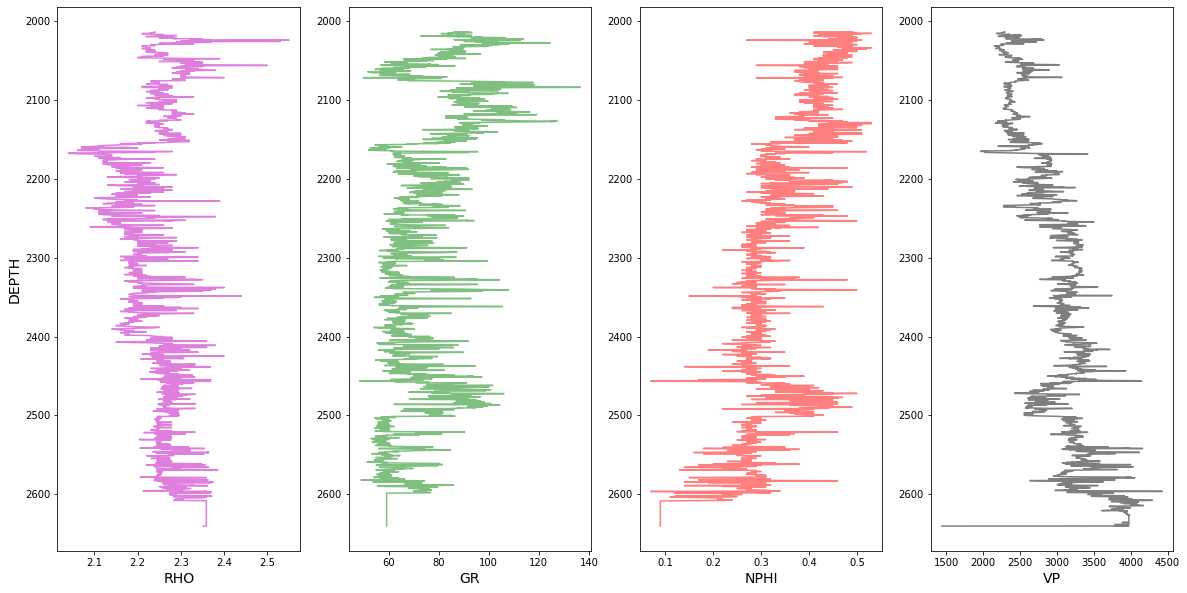

In [202]:
fig = plt.figure(figsize=(20, 10)) 

ax1 = fig.add_subplot(1, 4, 1)
ax1.plot(logdf_2['RHO'], logdf_2['DEPTH'], color = 'm', alpha=0.5)
ax1.set_ylabel('DEPTH', fontsize = '14' )
ax1.set_xlabel('RHO', fontsize = '14')
plt.gca().invert_yaxis()

ax2 = fig.add_subplot(1, 4, 2)
ax2.plot(logdf_2['GR'], logdf_2['DEPTH'], color = 'g', alpha=0.5)
ax2.set_xlabel('GR', fontsize = '14')
plt.gca().invert_yaxis()

ax3 = fig.add_subplot(1, 4, 3)
ax3.plot(logdf_2['NPHI'], logdf_2['DEPTH'], color = 'r', alpha=0.5)
ax3.set_xlabel('NPHI', fontsize = '14')
plt.gca().invert_yaxis()

ax4 = fig.add_subplot(1, 4, 4)
ax4.plot(logdf_2['VP'], logdf_2['DEPTH'], color = 'k', alpha=0.5)
ax4.set_xlabel('VP', fontsize = '14')
plt.gca().invert_yaxis()

plt.show()

### ** Neural Network
add scaler for NN deep learning

In [107]:
logdf_2 = logs.copy()
X = logdf_2.drop(['RHO_OLD', 'RHO'], axis=1).values
y = logdf_2.RHO_OLD.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [109]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

In [176]:
model = Sequential()

model.add(Dense(76,activation='relu', input_shape=(7,)))
model.add(Dense(38,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=adam,loss='mae')

In [177]:
earlystop_callback = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10, verbose=0)
model.fit(x=X_train,y=y_train, callbacks=[earlystop_callback],
          validation_split=0.2, batch_size=128, epochs=100)

Train on 2634 samples, validate on 659 samples
Epoch 1/100
2634/2634 [==============================] - 1s 392us/sample - loss: 1.9660 - val_loss: 1.5142
Epoch 2/100
2634/2634 [==============================] - 0s 41us/sample - loss: 0.7896 - val_loss: 0.3641
Epoch 3/100
2634/2634 [==============================] - 0s 44us/sample - loss: 0.2373 - val_loss: 0.1546
Epoch 4/100
2634/2634 [==============================] - 0s 42us/sample - loss: 0.1453 - val_loss: 0.1167
Epoch 5/100
2634/2634 [==============================] - 0s 45us/sample - loss: 0.1080 - val_loss: 0.0964
Epoch 6/100
2634/2634 [==============================] - 0s 42us/sample - loss: 0.0934 - val_loss: 0.0879
Epoch 7/100
2634/2634 [==============================] - 0s 41us/sample - loss: 0.0864 - val_loss: 0.0829
Epoch 8/100
2634/2634 [==============================] - 0s 46us/sample - loss: 0.0812 - val_loss: 0.0793
Epoch 9/100
2634/2634 [==============================] - 0s 43us/sample - loss: 0.0775 - val_loss: 0.077

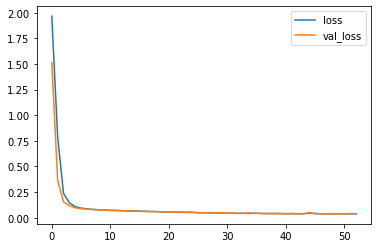

In [178]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [179]:
predictions = model.predict(X_test)

In [180]:
mean_absolute_error(y_test,predictions)

0.03693787275008784

In [181]:
r2_score(y_test,predictions)

0.7357023993702011

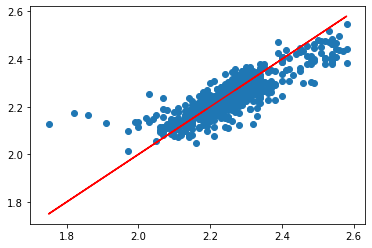

In [182]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

### !!! Compare two ML methods and it shows that RF works better so far for this case
NN need choose the right hyperparameters, or overfitting
